(303, 14)
(297, 14)


--- Heart Disease Dataset ---
(297, 14) (297, 13)
(297, 13) (297,)

=== Heart Disease Train/Test 40/60 ===
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        96
           1       0.78      0.72      0.75        83

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

[[79 17]
 [23 60]]


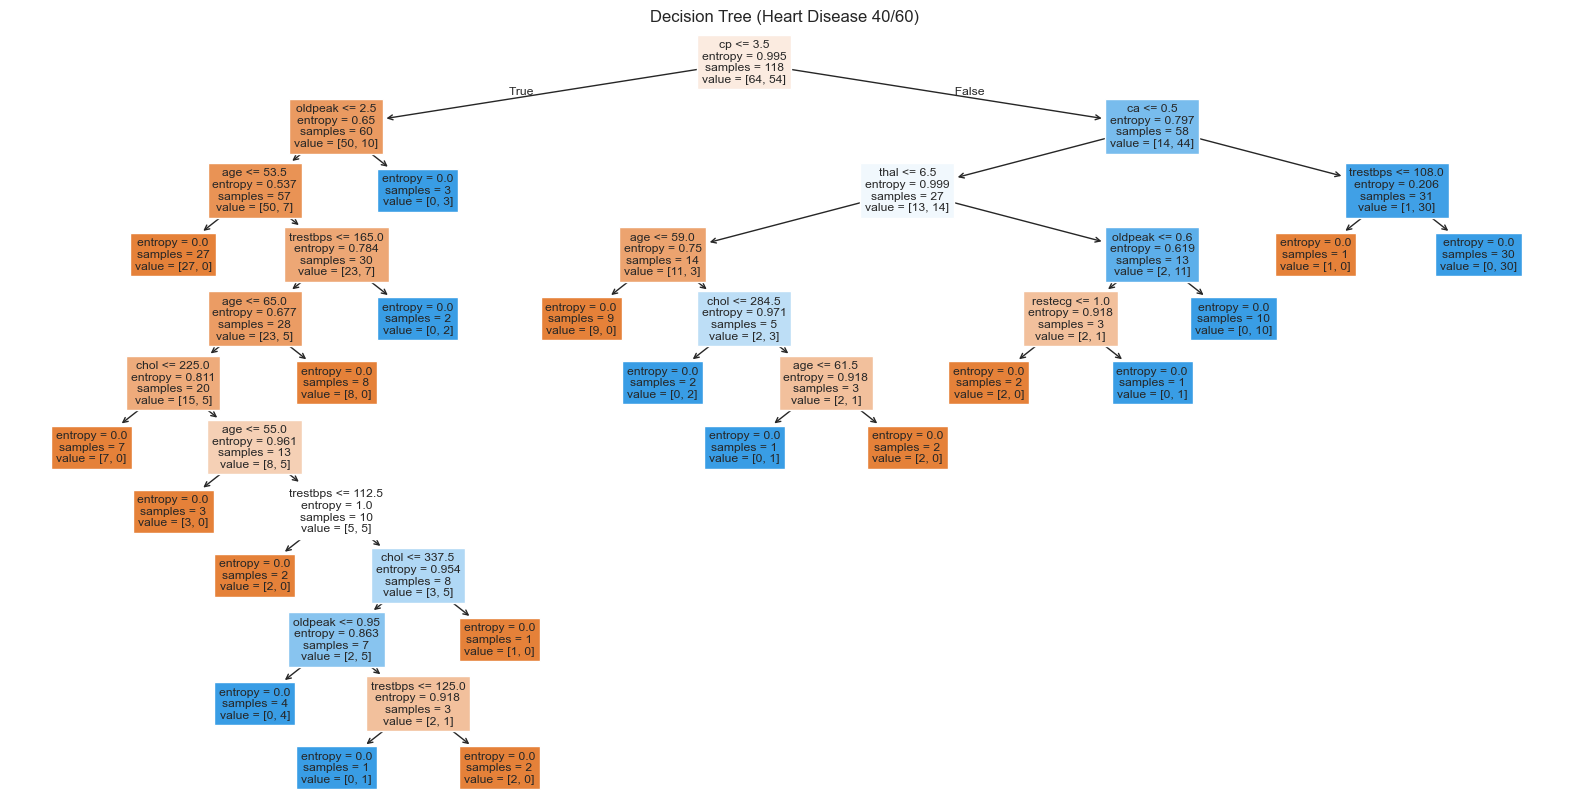


=== Heart Disease Train/Test 60/40 ===
              precision    recall  f1-score   support

           0       0.72      0.86      0.79        64
           1       0.79      0.62      0.69        55

    accuracy                           0.75       119
   macro avg       0.76      0.74      0.74       119
weighted avg       0.75      0.75      0.74       119

[[55  9]
 [21 34]]


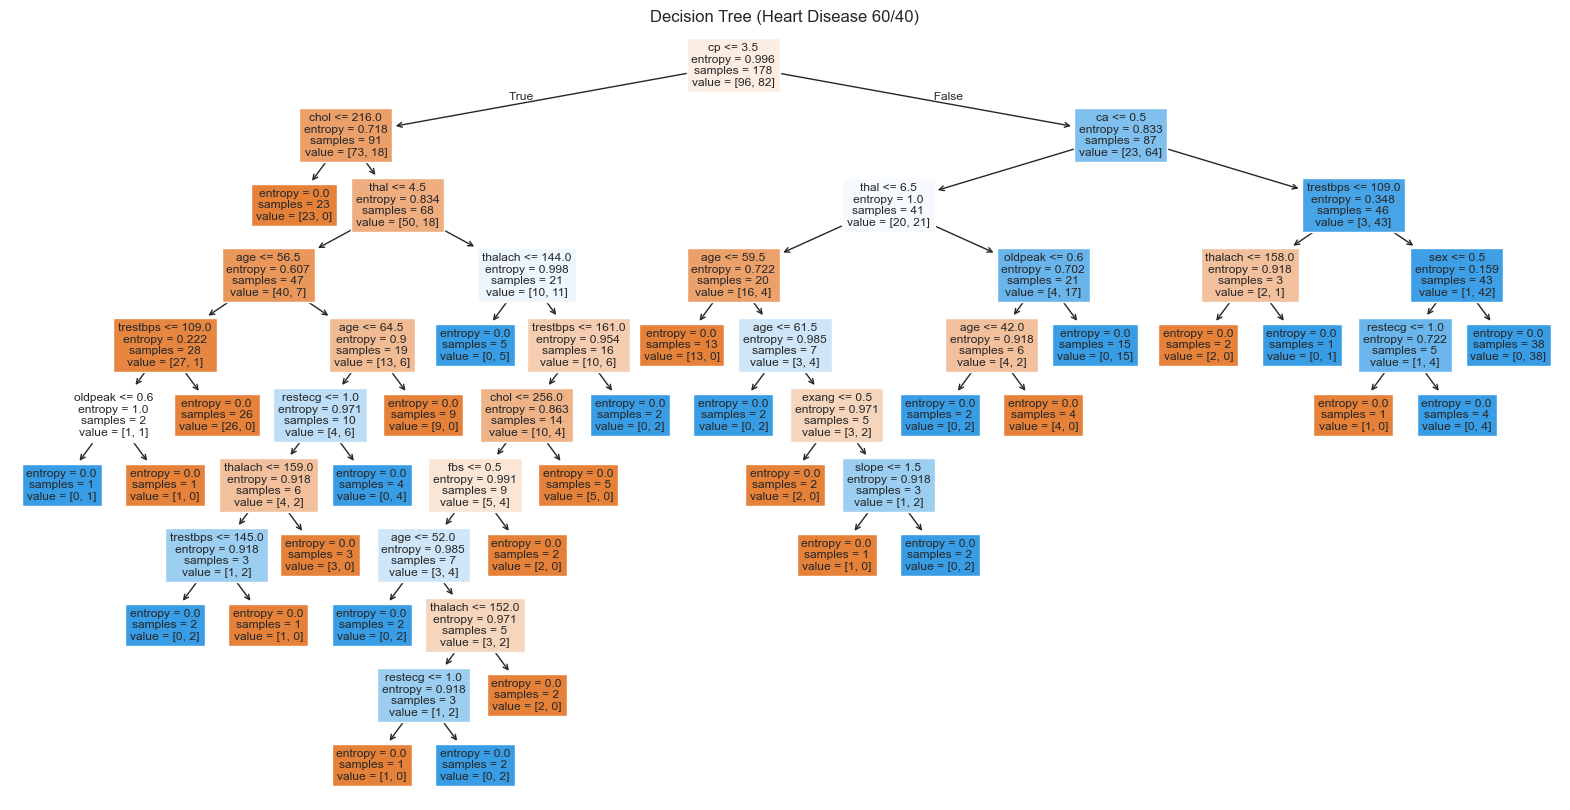


=== Heart Disease Train/Test 80/20 ===
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

[[24  8]
 [ 6 22]]


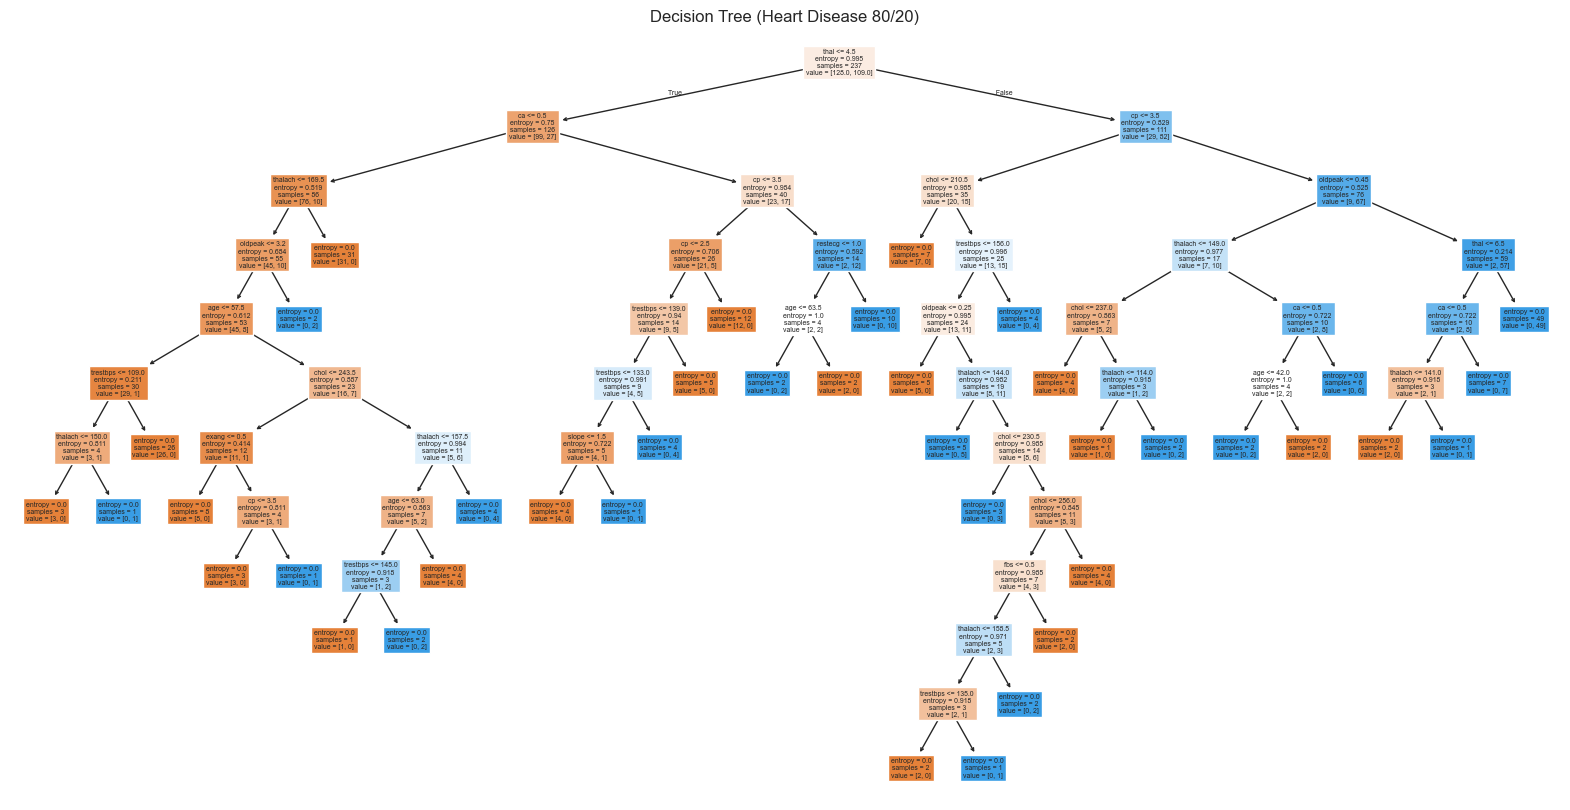


=== Heart Disease Train/Test 90/10 ===
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.73      0.57      0.64        14

    accuracy                           0.70        30
   macro avg       0.71      0.69      0.69        30
weighted avg       0.70      0.70      0.69        30

[[13  3]
 [ 6  8]]


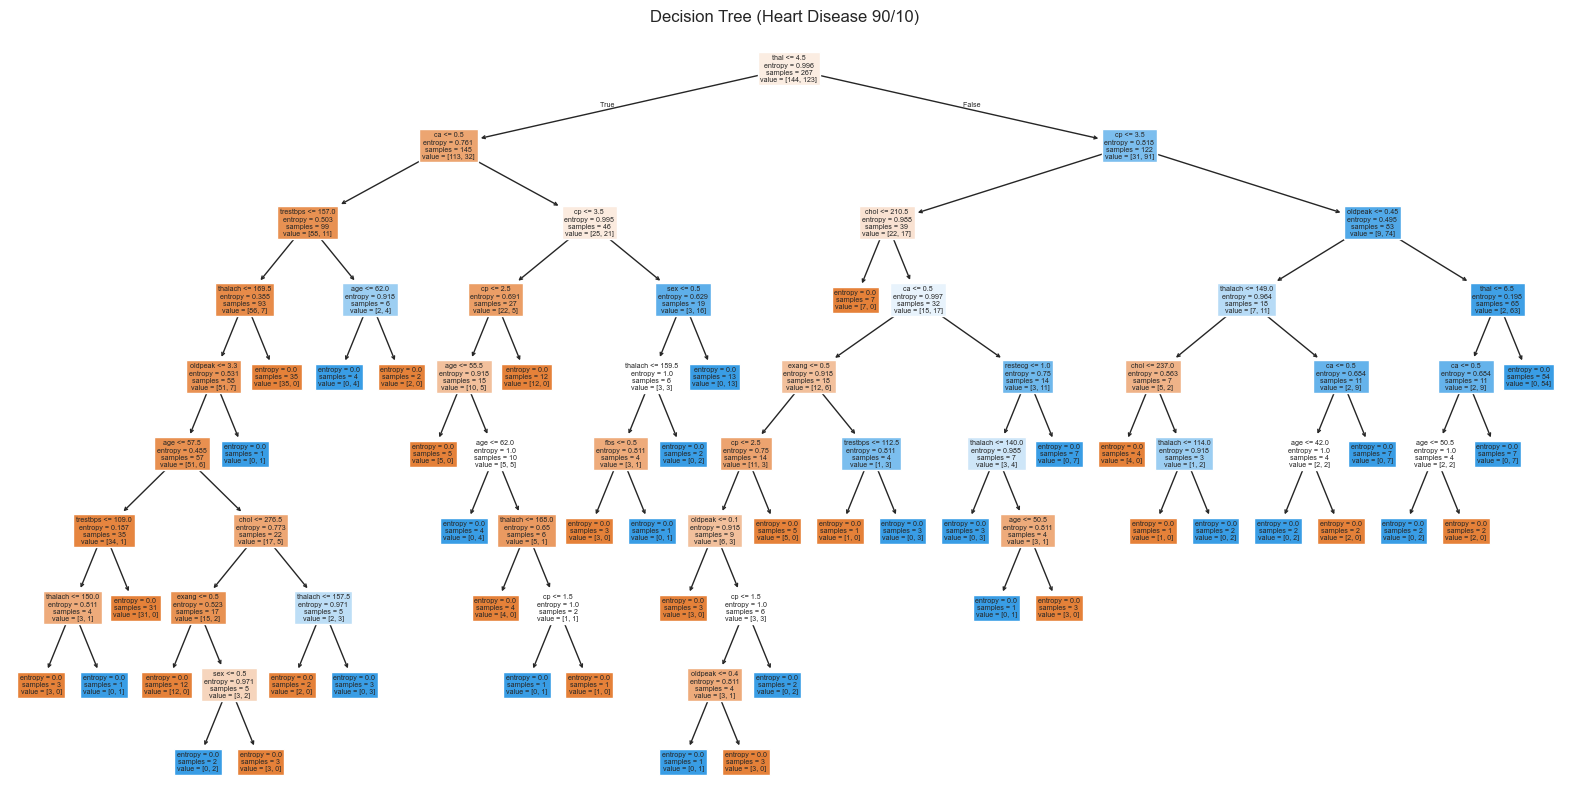

train_40
X: (118, 13)
y: 118
test_60
X: (179, 13)
y: 179
train_60
X: (178, 13)
y: 178
test_40
X: (119, 13)
y: 119
train_80
X: (237, 13)
y: 237
test_20
X: (60, 13)
y: 60
train_90
X: (267, 13)
y: 267
test_10
X: (30, 13)
y: 30
Max Depth None: Accuracy 0.7667


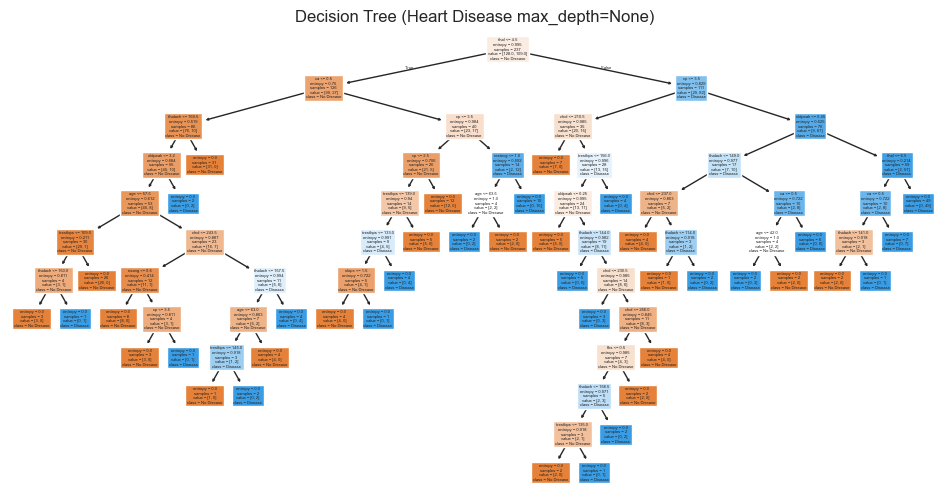

Max Depth 2: Accuracy 0.7167


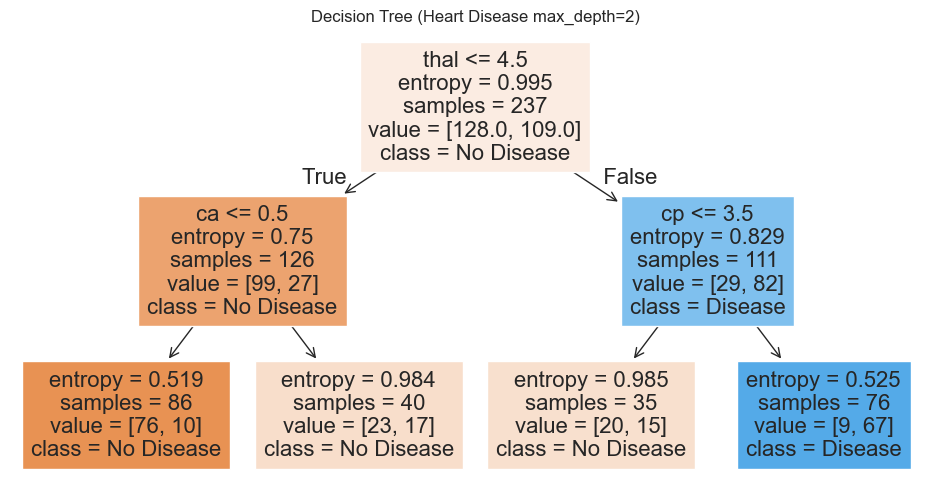

Max Depth 3: Accuracy 0.8167


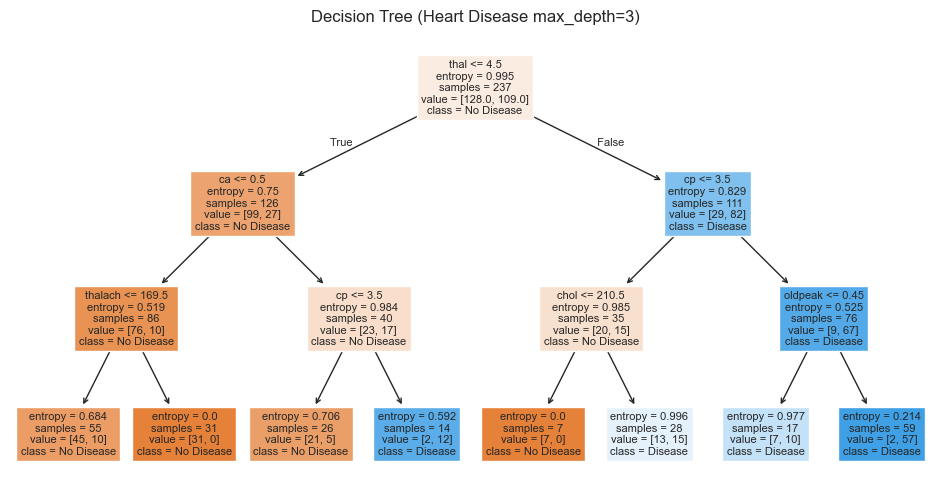

Max Depth 4: Accuracy 0.7667


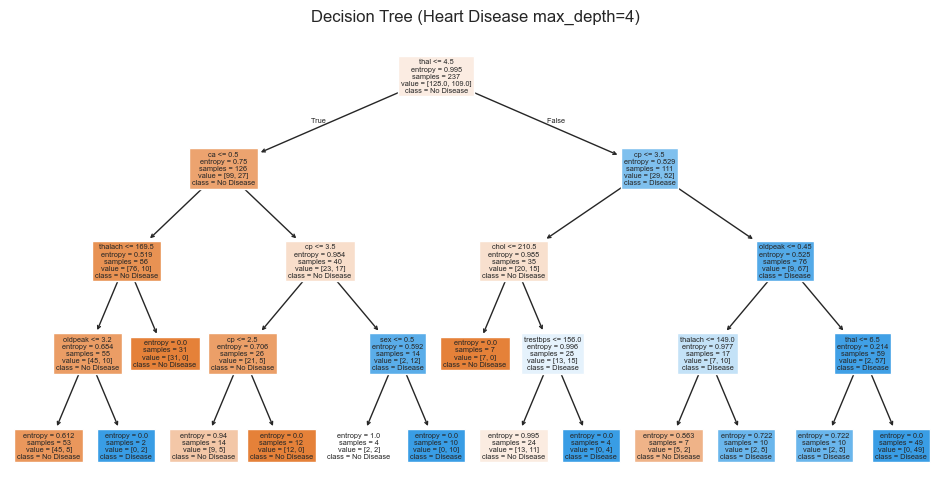

Max Depth 5: Accuracy 0.7667


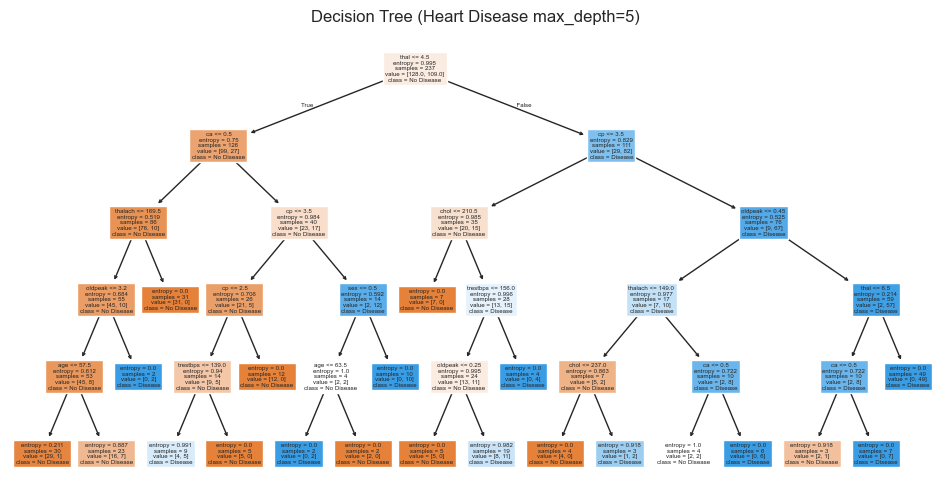

Max Depth 6: Accuracy 0.7333


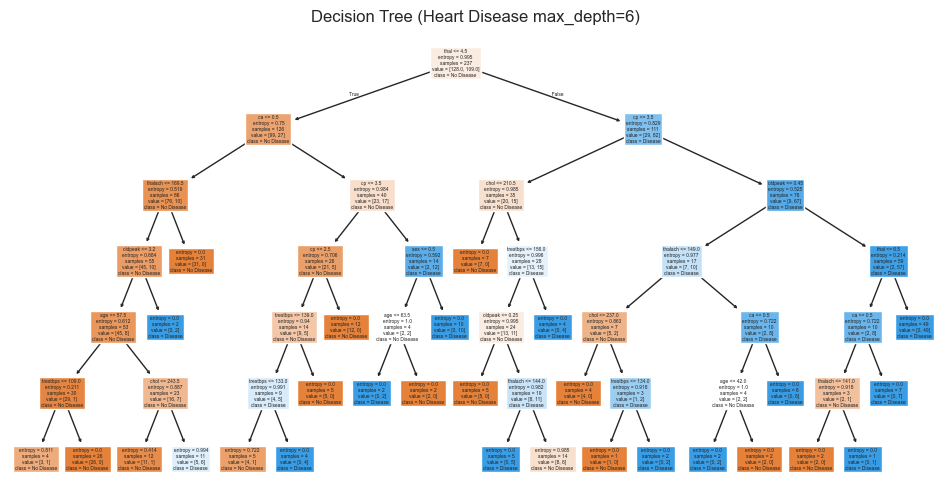

Max Depth 7: Accuracy 0.7667


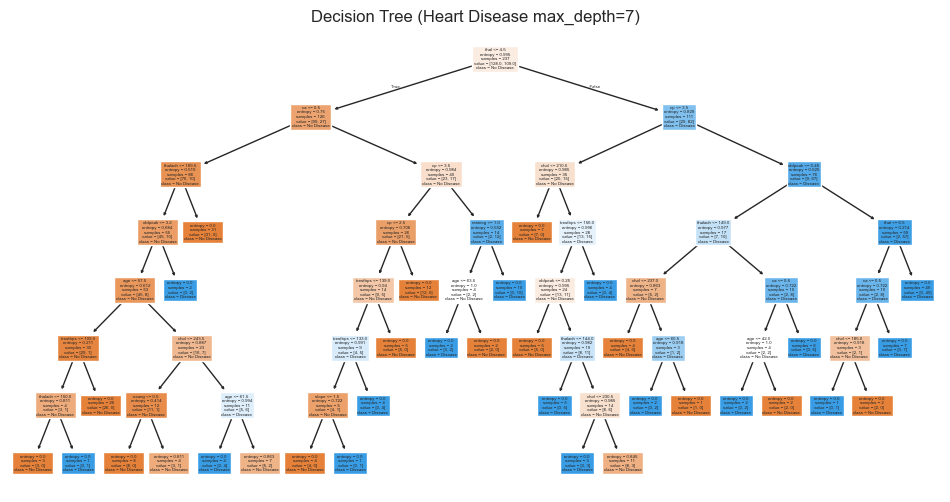

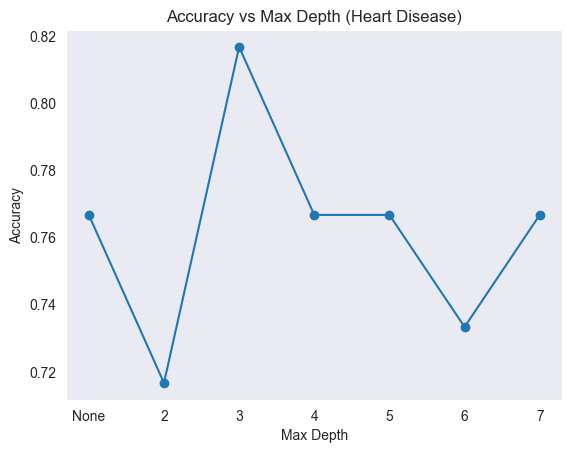

In [21]:
# Project 2 - Decision Tree Classifiers (Heart Disease, Penguins, Wine)

# --- Setup ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Load datasets ---
# Heart Disease dataset
heart_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
heart_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
              'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
              'ca', 'thal', 'target']
heart = pd.read_csv(heart_url, names=heart_cols)
print(heart.shape)
# Clean missing values ("?")
heart = heart.replace('?', np.nan)
heart = heart.dropna()
heart = heart.astype(float)
print(heart.shape)

# Heart Disease is binary: convert target >0 to 1
heart['target'] = heart['target'].apply(lambda x: 1 if x > 0 else 0)

# --- Prepare function for splitting and visualizing ---
def prepare_data(X, y, test_size, seed=42):
    return train_test_split(X, y, test_size=test_size, stratify=y, random_state=seed, shuffle=True)

def plot_distribution(y, title):
    sns.countplot(x=y)
    plt.title(title)
    plt.show()

# --- Prepare all splits ---

def prepare_all_splits(X, y, dataset_name):
    splits = {}
    print(X.shape, y.shape)
    for split_ratio in [0.6, 0.4, 0.2, 0.1]:
        X_train, X_test, y_train, y_test = prepare_data(X, y, test_size=split_ratio)
        splits[f'train_{int((1-split_ratio)*100)}'] = (X_train, y_train)
        splits[f'test_{int((split_ratio)*100)}'] = (X_test, y_test)

        # plot_distribution(y_train, f'{dataset_name} - Train {int((1-split_ratio)*100)}%')
        # plot_distribution(y_test, f'{dataset_name} - Test {int((split_ratio)*100)}%')
    return splits

# --- Train and evaluate Decision Trees ---

def train_and_evaluate(splits, dataset_name):
    results = {}
    for split in ['40', '60', '80', '90']:
        X_train, y_train = splits[f'train_{split}']
        X_test, y_test = splits[f'test_{100-int(split)}']

        clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        print(f"\n=== {dataset_name} Train/Test {split}/{100-int(split)} ===")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))

        # Visualize tree
        plt.figure(figsize=(20,10))
        plot_tree(clf, filled=True, feature_names=X_train.columns)
        plt.title(f"Decision Tree ({dataset_name} {split}/{100-int(split)})")
        plt.show()

        results[split] = (clf, accuracy_score(y_test, y_pred))
    return results

# --- Test different max_depth values ---
def depth_analysis(X_train, X_test, y_train, y_test, dataset_name):
    depths = [None,2,3,4,5,6,7]
    accuracies = []

    for d in depths:
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        print(f"Max Depth {d}: Accuracy {acc:.4f}")
        plt.figure(figsize=(12,6))
        plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["No Disease", "Disease"])
        plt.title(f"Decision Tree ({dataset_name} max_depth={d})")
        plt.show()

    # Plot accuracies
    plt.plot([str(d) for d in depths], accuracies, marker='o')
    plt.title(f"Accuracy vs Max Depth ({dataset_name})")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.show()

# --- Heart Disease Dataset ---
print("\n\n--- Heart Disease Dataset ---")
X_heart = heart.drop('target', axis=1)
print(heart.shape, X_heart.shape)
y_heart = heart['target']
heart_splits = prepare_all_splits(X_heart, y_heart, "Heart Disease")
heart_results = train_and_evaluate(heart_splits, "Heart Disease")

# Depth Analysis for Heart Disease (80/20)
X_train_hd, y_train_hd = heart_splits['train_80']
X_test_hd, y_test_hd = heart_splits['test_20']

for i in heart_splits:
	print(i)
	print(f"X:", heart_splits[i][0].shape)
	print(f"y:", len(heart_splits[i][1]))

depth_analysis(X_train_hd, X_test_hd, y_train_hd, y_test_hd, "Heart Disease")

In [ ]:
from graphviz import Digraph
from IPython.display import display

# Create a sample Graphviz graph
dot = Digraph()

dot.node('A', 'Start')
dot.node('B', 'End')
dot.edge('A', 'B')

# Display the graph in Jupyter without needing the Graphviz executable
display(dot)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from sklearn.datasets import load_iris
from IPython.display import display

# Load dataset (for example, Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Train a decision tree classifier (ID3 - entropy criterion)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X, y)

# Export the decision tree as a DOT file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=data.feature_names,
                           class_names=data.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz Source object to render the DOT
graph = Source(dot_data)

# Display the decision tree
output_file = f"decision_tree_depth.png"
graph.render(output_file, cleanup=True, directory=".")

display(graph)
